In [24]:
#Importing Dependcies

import spotipy
import time
from IPython.core.display import clear_output
from spotipy import SpotifyClientCredentials, util
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")
from flask import request

#Libraries to create the multiclass model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

#Library to validate the model
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report 

#connection to credentials
from credentials import*

In [25]:
# Creating csv path and loading second data in Pandas DataFrame

csv_path = ("data/data_moods.csv")
datamood_df = pd.read_csv(csv_path)
datamood_df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [26]:
# creating a dataframe grouping the selected track features by labels(mood) calculating the mean of the tracks’ features
# This dataframe provides good insights about our dataset
# For instance, sad songs tend to have a long length, Happy songs are more danceable and have a higher valence... ecc  
cols = ['danceability', 'energy', 'loudness', 'speechiness','length', 
                         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','mood']
data = datamood_df[cols].copy()
df = data.groupby(["mood"]).mean()
df

,danceability,energy,loudness,speechiness,length,acousticness,instrumentalness,liveness,valence,tempo
mood,,,,,,,,,,
Calm,0.406815,0.156325,-20.955826,0.040742,193977.061538,0.883348,0.890769,0.115418,0.151421,108.851215
Energetic,0.512240,0.883669,-4.695844,0.079170,215779.948052,0.028229,0.056607,0.233897,0.437049,132.060636
Happy,0.622914,0.751857,-7.275750,0.061774,230963.850000,0.127849,0.126103,0.201682,0.579095,124.213679
Sad,0.497245,0.388068,-10.569183,0.041736,247504.472081,0.578826,0.201832,0.140655,0.289372,115.599746


In [27]:
# Choosing the features for our analysis

chosen_cols = ['danceability', 'energy', 'loudness', 'speechiness','length', 
                         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

data_df = datamood_df[chosen_cols].copy()

data_df.head()

,danceability,energy,loudness,speechiness,length,acousticness,instrumentalness,liveness,valence,tempo
0,0.866,0.730,-8.201,0.0767,379266,0.13700,0.000000,0.0843,0.625,118.523
1,0.381,0.832,-5.069,0.0492,318800,0.01890,0.196000,0.1530,0.166,120.255
2,0.346,0.139,-15.326,0.0321,217946,0.91300,0.000077,0.0934,0.116,136.168
3,0.466,0.438,-12.858,0.0608,233000,0.08900,0.000006,0.1130,0.587,193.100
4,0.419,0.932,-3.604,0.1060,268000,0.00171,0.000000,0.1370,0.445,169.881


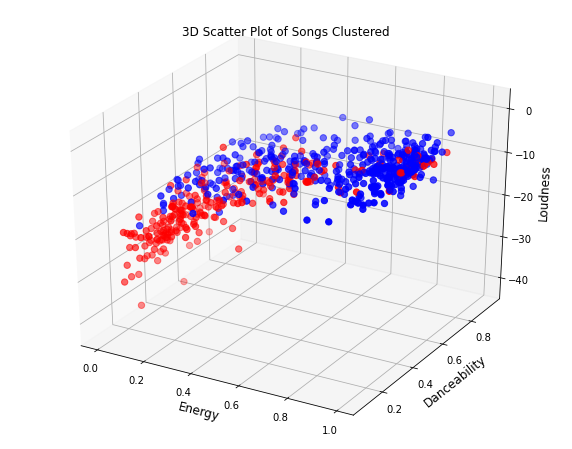

In [28]:
# Comparing the Attributes

col_features = data_df.columns[6:]
X = MinMaxScaler().fit_transform(data_df[col_features])
kmeans = KMeans(init = "k-means++",n_clusters = 2,random_state = 15).fit(X)
data_df['kmeans'] = kmeans.labels_
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = data_df['energy']
y = data_df['danceability']
z = data_df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z, c = data_df['kmeans'],s = 40,cmap = cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

plt.savefig("image/3D_scatter")

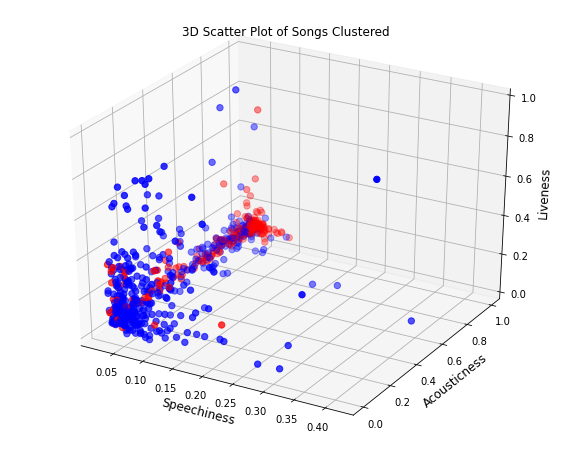

In [29]:
# Comparing the Attributes

col_features = data_df.columns[6:]
X = MinMaxScaler().fit_transform(data_df[col_features])
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)
data_df['kmeans'] = kmeans.labels_
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = data_df['speechiness']
y = data_df['acousticness']
z = data_df['liveness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z, c = data_df['kmeans'],s = 40,cmap=cmhot)
ax.set_xlabel('Speechiness',fontsize=12)
ax.set_ylabel('Acousticness',fontsize=12)
ax.set_zlabel('Liveness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

plt.savefig("image/3D_scatter2")

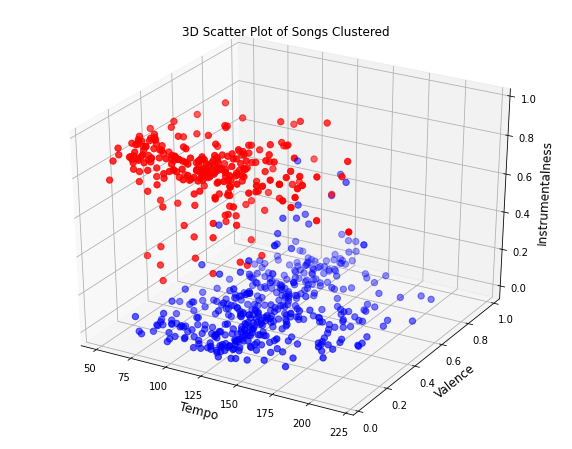

In [30]:
# Comparing the Attributes

col_features = data_df.columns[6:]
X = MinMaxScaler().fit_transform(data_df[col_features])
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)
data_df['kmeans'] = kmeans.labels_
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = data_df['tempo']
y = data_df['valence']
z = data_df['instrumentalness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z, c = data_df['kmeans'],s = 40,cmap=cmhot)
ax.set_xlabel('Tempo',fontsize=12)
ax.set_ylabel('Valence',fontsize=12)
ax.set_zlabel('Instrumentalness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

plt.savefig("image/3D_scatter3")

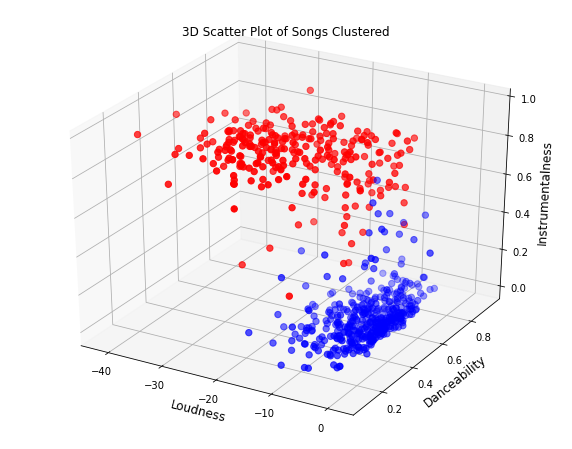

In [31]:
# Comparing the Attributes

col_features = data_df.columns[6:]
X = MinMaxScaler().fit_transform(data_df[col_features])
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)
data_df['kmeans'] = kmeans.labels_
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = data_df['loudness']
y = data_df['danceability']
z = data_df['instrumentalness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z, c=data_df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Loudness',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Instrumentalness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

plt.savefig("image/3D_scatter4")

# Building the model
### Pre-processing 

In [32]:
# Normalizing the features using MinMaxScaler to scale our values between a range of [0,1]
# we manage to preserve the shape of the original dataset

features = datamood_df.columns[6:-3]
X= MinMaxScaler().fit_transform(datamood_df[features])
X2 = np.array(datamood_df[features])
Y = datamood_df['mood']

In [33]:
features

Index(['length', 'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo'],
      dtype='object')

In [34]:
X

array([[0.68499321, 0.91300313, 0.13754556, ..., 0.77991236, 0.13620163,
        0.40459309],
       [0.54806839, 0.35042338, 0.01897062, ..., 0.85214483, 0.06619145,
        0.41496497],
       [0.31968524, 0.30982485, 0.91666622, ..., 0.61559041, 0.02265784,
        0.5102581 ],
       ...,
       [0.20944746, 0.65317249, 0.78915549, ..., 0.75258303, 0.07968432,
        0.43798431],
       [0.32240263, 0.55921587, 0.91666622, ..., 0.62082565, 0.04378819,
        0.30641356],
       [0.2480933 , 0.34578355, 0.99799196, ..., 0.31326107, 0.04200611,
        0.5342775 ]])

In [35]:
X2

array([[ 3.79266e+05,  8.66000e-01,  1.37000e-01, ..., -8.20100e+00,
         7.67000e-02,  1.18523e+02],
       [ 3.18800e+05,  3.81000e-01,  1.89000e-02, ..., -5.06900e+00,
         4.92000e-02,  1.20255e+02],
       [ 2.17946e+05,  3.46000e-01,  9.13000e-01, ..., -1.53260e+01,
         3.21000e-02,  1.36168e+02],
       ...,
       [ 1.69265e+05,  6.42000e-01,  7.86000e-01, ..., -9.38600e+00,
         5.45000e-02,  1.24099e+02],
       [ 2.19146e+05,  5.61000e-01,  9.13000e-01, ..., -1.50990e+01,
         4.04000e-02,  1.02128e+02],
       [ 1.86331e+05,  3.77000e-01,  9.94000e-01, ..., -2.84350e+01,
         3.97000e-02,  1.40179e+02]])

In [36]:
Y

0          Happy
1            Sad
2            Sad
3          Happy
4      Energetic
         ...    
681         Calm
682          Sad
683          Sad
684          Sad
685         Calm
Name: mood, Length: 686, dtype: object

<AxesSubplot:xlabel='mood', ylabel='count'>

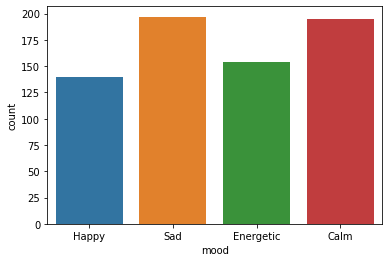

In [14]:
# Visualize number of data point for each class

sns.countplot(datamood_df['mood'])

In [37]:
#Encode the categories
#encoding the 4 categories remembering that the neural network uses numerical values in the tarining and testing processes

encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)


#Convert to  dummy (unnecessary in our case)
dummy_y = np_utils.to_categorical(encoded_y)

# Splitting  the data by 80% for training and 20% for testing

X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.2,random_state=15)

encoded_cat = pd.DataFrame({'mood':datamood_df['mood'].tolist(),'encode_val':encoded_y}).drop_duplicates().sort_values(['encode_val'],ascending=True)
encoded_cat

,mood,encode_val
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


# K-Nearest neighbor

* It is a non-parametric classification algorithm that does not require training. As the name suggests, it finds the “k” nearest data points for a given unknown data point, and the class which is dominant within those “k” neighbors is predicted as the output class. To find the neighbors, it uses distance metrics like euclidean distance and manhattan distance. You can find the optimal value for k using hyperparameter tuning. This algorithm is not very practical for cases where class distribution is skewed, or the selection of the k parameter is incorrect.

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# Transform the training and testing data by using the X_scaler and y_scaler models
X_scaler = MinMaxScaler().fit(X_train)

#X_train_scaled
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.725
k: 3, Train/Test Score: 0.876/0.775
k: 5, Train/Test Score: 0.841/0.768
k: 7, Train/Test Score: 0.836/0.761
k: 9, Train/Test Score: 0.821/0.761
k: 11, Train/Test Score: 0.819/0.790
k: 13, Train/Test Score: 0.810/0.775
k: 15, Train/Test Score: 0.816/0.790
k: 17, Train/Test Score: 0.812/0.812
k: 19, Train/Test Score: 0.808/0.812


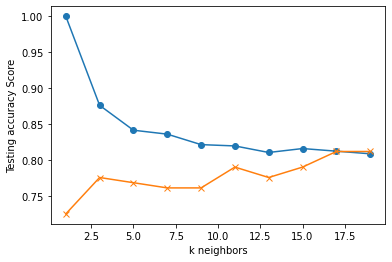

In [40]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    train_score = knn.score(X_train_scaled, Y_train)
    test_score = knn.score(X_test_scaled, Y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [41]:
# Note that k: 17 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, Y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, Y_test))

k=17 Test Acc: 0.812


In [42]:
y_true = Y_test
y_pred = knn.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[35,  0,  0,  3],
       [ 0, 31,  0,  0],
       [ 0, 11, 16,  1],
       [ 5,  2,  4, 30]], dtype=int64)

In [43]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        38
           1       0.70      1.00      0.83        31
           2       0.80      0.57      0.67        28
           3       0.88      0.73      0.80        41

    accuracy                           0.81       138
   macro avg       0.82      0.81      0.80       138
weighted avg       0.82      0.81      0.81       138



# Create a random forest model

In [ ]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=45).fit(X_train_scaled, Y_train)
print(f'Training Score: {clf.score(X_train_scaled, Y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, Y_test)}')

In [ ]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, Y_train)
sel.get_support()

# Compile, Evaluate and Train the Neural Network Model

In [ ]:
 #Create the model

def base_model():
   
    nn_model = Sequential()
    
    #First hidden layer with 8 nodes,input of 4 dim with relu function
    nn_model.add(Dense(units=8,input_dim=10,activation='relu'))
    
    #Second hidden layer with output 3 and softmax function
    #The output layer uses the softmax activation function rather than the sigmoid activation function. 
    #Each neuron in the output layer yields a probability for the corresponding class, and thanks to the softmax function, the sum of all the probabilities is 1.0.
    nn_model.add(Dense(units=4,activation='softmax'))
    
    #Compile the model using categorical_crossentropy loss function and adam optim
    nn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return nn_model

In [ ]:
cnn_model = base_model()
#cnn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

cnn_model.summary()

In [ ]:
#Configure the model
estimator = KerasClassifier(build_fn=base_model,epochs=300,verbose=0)

In [ ]:
#Evaluate the model using KFold cross validation
# Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample
#commonly used in applied ML to compare and select a model for a given predictive modeling problem because it is easy to understand
#easy to implement and results in skills estimates that generally have a lower bias than others methods

kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,encoded_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

In [ ]:
#Training the model with the train data which represents the 80% of the main data
us_model=estimator.fit(X_train,Y_train)
#us_model

# using the test data to predict the model
y_pred = estimator.predict(X_test)
#y_pred

In [ ]:
# plotting a confusion matrix to evaluate the accuracy of the model
# Accuracy is the % of correct predictions
confx = confusion_matrix(Y_test,y_pred)
ax = plt.subplot()
sns.heatmap(confx,annot=True,ax=ax)

labels =encoded_cat['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

plt.savefig("image/Confusion_Matrix")

print("Accuracy Score",accuracy_score(Y_test,y_pred))


In [ ]:
#credentials field

client_id = "Your Client ID"
client_secret = "Your Client Secret"

In [ ]:
#Credentials to access the Spotify Music Data

manager = SpotifyClientCredentials(client_id,client_secret)
sp = spotipy.Spotify(client_credentials_manager=manager)

In [ ]:
def access_features(ids):

    metaData = sp.track(ids)
    features = sp.audio_features(ids)

    # meta
    name = metaData['name']
    album = metaData['album']['name']
    artist = metaData['album']['artists'][0]['name']
    release_date = metaData['album']['release_date']
    length = metaData['duration_ms']
    popularity = metaData['popularity']
    ids =  metaData['id']

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    valence = features[0]['valence']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    key = features[0]['key']
    time_signature = features[0]['time_signature']

    song = [name, album, artist, ids, release_date, popularity, length, danceability, acousticness,
            energy, instrumentalness, liveness, valence, loudness, speechiness, tempo, key, time_signature]
    columns = ['name','album','artist','id','release_date','popularity','length','danceability','acousticness','energy','instrumentalness',
                'liveness','valence','loudness','speechiness','tempo','key','time_signature']
    return song,columns

In [ ]:
#Joining the model and the MinMaxscaler in a Pipeline
# The batch size defines the number of samples that will be propagated through the network
    

def predict_mood(id_song):
    
    pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0))])
    
    #Fitting the Pipeline
    pip.fit(X2,encoded_y)

    #Obtaining the features of the song
    
    pred = access_features(id_song)
    
    #Pre-processing the features to input the Model
    
    pred_features = np.array(pred[0][6:-2]).reshape(-1,1).T

    #Predicting the features of the song
    results = pip.predict(pred_features)

    mood = np.array(encoded_cat['mood'][encoded_cat['encode_val']==int(results)])
    name_song = pred[0][0]
    artist = pred[0][2]

    return print("{0} by {1}, and the predicted mood is {2}!".format(name_song,artist,mood[0].upper()))
    

In [ ]:
predict_mood('5ZIHOepZSyDkNDqs0zALGk')